# Reproducibility Notebook
This notebook generates the figures for the manuscript:

**“Electroconductive Polymer Brushes for Supercapacitors: Insights from Self-Consistent Field Modeling”**

The goal is that anyone with the raw SF–SCF output (e.g., from SFBox) can reproduce all plots used in the article.

## Imports and Global Settings

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from multiprocessing import Pool, cpu_count
import os
import pickle
from cap import Cap
from run import paramsHP
from run import Brushes_mp
from run import getCAPS # some imports unused, but kept for consistency

# Use a consistent style for all figures
plt.rcParams.update({
    'figure.dpi': 120,
    'font.size': 11,
    'axes.labelsize': 11,
    'axes.titlesize': 11,
    'legend.fontsize': 9,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'lines.linewidth': 1.5,
})

# Base directory where all SF-SCF / SFBox data files will be stored
# Adjust this path as needed.
DATA_DIR = Path('data')
DATA_DIR.mkdir(exist_ok=True)


## Utility Functions

Helper functions for loading SF–SCF output and computing basic quantities.
We will refine these as needed once the data formats are fixed.

In [2]:
def Brushes_mp(CAPS):
    global iguess, use_iguess
    iguess = None
    use_iguess = False
    with Pool(processes=cpu_count()) as pool:  # adjust workers
        caps = pool.map(runBrush, CAPS)
    CAPSsolved = []
    for c in caps:
        if c.solved:
            CAPSsolved.append(c)
    return CAPSsolved

def runBrush(cap):
    # print(f'alpha={alpha}')
    global iguess, use_iguess
    
    if iguess:
        print (iguess)
        cap.iguess_in = iguess
        cap.__str__()
    cap.loadData(silent=True)
    if cap.solved:
        # Brush.getTheta()
        # Brush.getProfiles()
        print(f"{cap.fname}: simulation completed successfully\n")
        if use_iguess:
            iguess = cap.fnameiguess
    else:
        print(f"{cap.fname}: simulation failed\n")
    
    return cap

## Data Production


In [3]:

params = {
    'phi': 0.0,
    'N': 200,
    'cna': 0.4,
    'D': 500,
    'timeout': 600,
    'alpha': 0.3,
    'sigma':3.5e-10,
}

paramsHP.update(params)
f = 0.0
t = 0.81
# t = 0.4

n=28



Alphas = np.round(np.linspace(f, t, n),3) # 
# Alphas = np.round(np.linspace(f, t, 2*n-1),3) # Twice detailed  scan
# Alphas = np.round(np.linspace(f, t, 4*n-3),3) # Four times more detailed  scan
# Alphas = np.round(np.linspace(f, t, 8*n-7),3) #Eught times more detailed scan


# ------------------------------
# Parameter grids
# ------------------------------

phis = [0.0, 0.2, 0.4]       # grafting densities (chains/nm²)
# pKs = [1.0, 2.0, 3.0]
pKs  = [1.0]            # pK values
# cnas = [0.1, 0.4, 1.6]
cnas = [0.4, 1.6]       # salinities (mol/L)
# chis = [4.0, 2.0, 0.0]
chis = [0.0, 2.0, 4.0]            # Flory–Huggins parameter χ (in kT units)

CAPS = []
for pK in pKs :
    paramsHP.update({'pK': pK}) 
    for cna in cnas:
        paramsHP.update({'cna': cna})    
        for chi in chis:
            paramsHP.update({'chi': chi})
            paramsHP.update({'chi_subano': 5.0})
            for phi in phis:
                paramsHP.update({'phi': phi})    

                for alpha in Alphas:
                    paramsHP.update({'alpha': alpha})    
                    # pprint.pprint(paramsHP)
                    Brush = Cap(**paramsHP)
                    CAPS.append(Brush)

# parameters dictionary for HomoPolymer



Brushes_mp(CAPS)


CaphZFN7Rqjm8jiWduAEKCKwU: simulation failed
Capn59NSqsoapxTPam5LTxe5Y: simulation failed


CapJ37Dva3C9xWg6aKqggGnfn: simulation failed

Cap4oVkE7vWL8nxZfHB7Re3KT: simulation failed

CapQ8RHk4BJBdoZEwqacqGPvD: simulation completed successfully
CapWTX3qZ84kXZ3kyKvjeRqSJ: simulation failed

CapYzEFhQJon3V6HMer394cPj: simulation completed successfully
CapMMfuXffPPX5egPDzEzjLFA: simulation completed successfully

Cap6MHaSjerNZ9CCjH8yNvNrc: simulation completed successfully


CapBQyJrBaGnevAZEPeRyCbk3: simulation completed successfully
CapNLYEdKg5KVX4ov5daSnZso: simulation completed successfully

CapBqjwWssmaujsxy7bVTyByK: simulation failed



Cap4fwagw2kQuVAFFyH4bNMas: simulation completed successfully
Cap6nof9cKzWFyGZsMyMYnJLx: simulation completed successfully
CapPrd5ExUjb2BHCdRCUJQp58: simulation completed successfully

CapjeHvJ39qXQRPjk9o8qf4gZ: simulation failed


Cape62JsqTEkmJ23NntqxAC7n: simulation completed successfully
Cap3frKSAXLrAEHF68GjrRjA9: simulation completed successfully

In [4]:



# ------------------------------
# File & directory setup
# ------------------------------

PICKLE_FILE = "data_CAPS.pkl"

DATA_DIR = "data"

os.makedirs(DATA_DIR, exist_ok=True)

# ------------------------------
# Load existing CAPSHL (if any)
# ------------------------------

if os.path.exists(PICKLE_FILE):
    with open(PICKLE_FILE, "rb") as f:
        CAPSHL = pickle.load(f)
    print(f"Loaded {len(CAPSHL)} entries from {PICKLE_FILE}")
else:
    CAPSHL = getCAPS(pKs, cnas, chis, phis, Alphas, mp=True)
    print("No existing pickle found. Starting with an empty CAPSHL dict.")


with open(PICKLE_FILE, "wb") as f:
    pickle.dump(CAPSHL, f)

print(f"\nCAPSHL now contains {len(CAPSHL)} entries and was saved to {PICKLE_FILE}")


Loaded 18 entries from data_CAPS.pkl

CAPSHL now contains 18 entries and was saved to data_CAPS.pkl


## Figure 2. Electric Double Layer in a Bare Half-Cell

This section will generate:
- (a) Na$^+$ and Cl$^-$ density profiles + potential near a bare electrode.
- (b) Stored ionic charge $Q$ vs surface potential $\psi_0$ for different
  salt concentrations.

Once the SFBox (or other) output files are exported, we will:
1. Place them into `data/` with clear filenames, e.g. `EDL_profile_cs0.1.dat`.
2. Use `load_profile` and `load_Q_vs_psi` to read them.
3. Plot with consistent styles used in the paper.

Loaded: CapJ5Sqeh238JanYuicsHq4GX
Loaded: CapXMRxBkpJ6bVxsEVNEQMfMT
Loaded: Cap25YzEnJC7yggDAQ2jekpnr


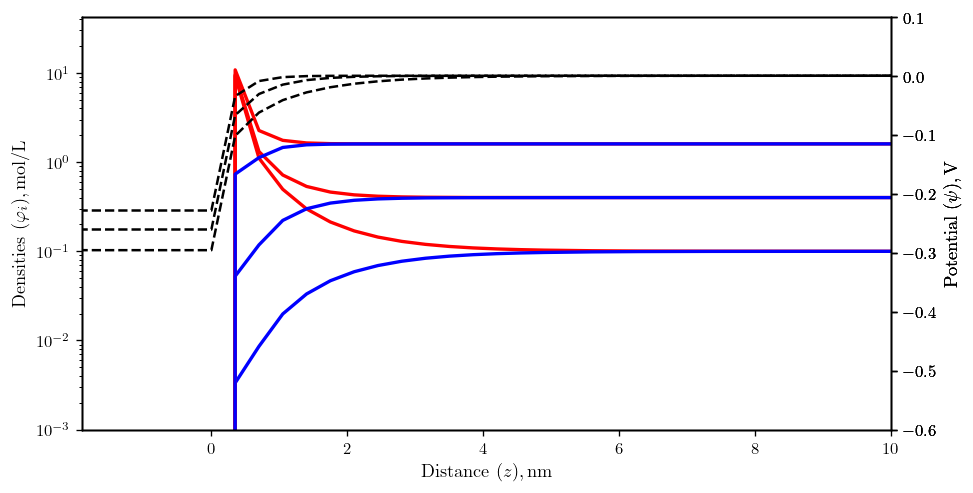

In [5]:
# Figure 2.1 generation (Jupyter version)

from cap import Cap
import os

# Salt concentrations to simulate
CSs = [0.1, 0.4, 1.6]

cells = []
ax = None
paramsHP.update({"phi": 0.0})
paramsHP.update({"alpha": 0.3})

for cna in CSs:
    # Update NaCl concentration
    paramsHP.update({"cna": cna})

    # Create simulation cell
    cell = Cap(**paramsHP)

    # Load precomputed results
    # print(cell.fname)
    cell.loadData()
    
    # Compute density and potential profiles
    cell.getProfiles()

    cells.append(cell)
    print(f"Loaded: {cell.fname}")

    # Overlay plots from each simulation
    ax, output_pdf_path = cell.plotSelectedProfiles(
        selected_lines=["Na", "Cl", "potential"],
        x_min=-1.9,
        x_max=10,
        ax=ax,
        add_title = False,
        show=False
    )

# Final figure
fig = ax.get_figure()

CapnQpHSfbSbLaDD5aTsjpMze: ready
CapbwBvxcBCMjVRubFjsbGrKZ: ready
CapJ3rZhkLrFRCx2tF866AmeT: ready
Cap9NC8p7LzLj83dEWJxCguBK: ready
CapXUwDGFWfokAq2bXrzcj3D5: ready





CapJJWU348QTJTeqHPnRrREx3: ready

Capg6dhbnfd4tAr7rHL6a9g4U: ready
Cap4q3xZ3KTafS8fmB4uDaKUB: ready
CapMLuBR2iBmw3knnEmQTRPSK: ready
CapUdPdJ6wtNZm6N5ZUNztNgx: ready

Capk6MYd2SABRGDEB7NSptpuB: ready
Cap5rhkuqTX4nsCXUZ5rApj3Y: ready





CapX9SrGYzRYmL8Kt8mBwycZw: ready
CapCh8y2Uay9KYpkvPHBguaMA: ready

CapDMiTjhi9fD7dEkgN62epdr: ready


CapKGSBGmWXYng4b4FWXKP8kw: ready

CapFTzCdnbuu95Pkh4knKGXkZ: ready

CapUrdTg4KZcAXZVVqVS9fVrD: ready

CapQESLgSzUWus9xeb6chWWcX: ready

CapHevLASDZWZ3LZYJmp67pKq: ready

CapPrd5ExUjb2BHCdRCUJQp58: ready

CapkjQiyUVLxzjMEpUGznzFbf: ready
CapCqWEH42qCaUGk4cro7Nni9: ready

CapJTTPTm4dweBhjZSKn6XnCu: ready
Cap5spFtywTuJiDrAwzecdJ29: ready


CapDREuG26o9hZpJukMZjCsNh: ready


CapNUUmHy9KfB2uwZetUCsiJX: ready
CapgtkQEApPqNHx6sJmWb2ymf: ready
CapboLdwgpDXNiPoDFSHKee7Y: ready


Cap9gX2tA9BUXyH

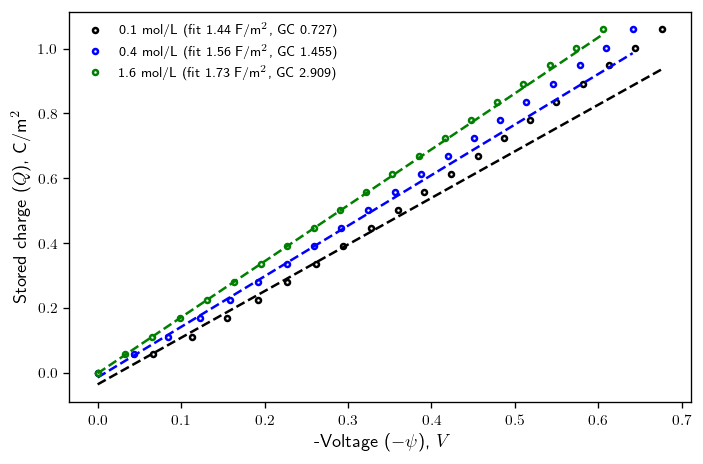

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os


# --- Helper: Least squares linear regression ---------------------------------
def least_squares_fit(x, y):
    """
    Fit a straight line y = m x + b to data (x, y).

    Returns
    -------
    m : float
        Slope of the best-fit line.
    b : float
        Intercept of the best-fit line.
    """
    coeffs = np.polyfit(x, y, 1)  # degree 1 for linear fit
    m, b = coeffs
    return m, b


# --- Parameters ---------------------------------------------------------------
f = 0.0           # start value of alpha
t = 0.81          # end value of alpha (forward scan)
n = 20            # number of alpha points

Alphas = np.round(np.linspace(f, t, n), 3)  # forward scan

pKs  = [1.0]
chis = [0.0]
phis = [0.0]

cnas = [0.1, 0.4, 1.6]  # salt concentrations (mol/L)

# Increase timeout for the SF-SCF runs, if needed
paramsHP.update({"timeout": 60})

# --- Generate all double-layer cells -----------------------------------------
CAPSDL = getCAPS(pKs, cnas, chis, phis, Alphas, mp=True)

# --- Plot setup ---------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 4))

colors = ["black", "blue", "green"]

epsilon0 = 8.854e-12  # F/m, vacuum permittivity
z = 1                 # ionic valence (monovalent ions)

for i, (key, CAPS) in enumerate(CAPSDL.items()):
    # Ensure all CAPS have theta and profiles computed
    for c in CAPS:
        c.getTheta()
        c.getProfiles()

    # Extract excess adsorption for Na and Cl
    ThetaNa = np.array([c.thetaNa_exc for c in CAPS])
    ThetaCl = np.array([c.thetaCl_exc for c in CAPS])

    # Net excess charge (dimensionless, per area unit used internally)
    Theta = ThetaNa - ThetaCl

    # Use the first CAP object as representative for constants
    c0 = CAPS[0]

    # Convert to C/m^2
    unit = c0.electron / (c0.sigma**2)  # Coulomb/m^2 per unit Theta
    Theta *= unit

    # Voltage array
    Voltage = np.array([c.V for c in CAPS])

    # Optional mask to remove unphysical/too-large data
    mask = Theta < 1000
    Theta = Theta[mask]
    Voltage = Voltage[mask]

    # x-axis: -Voltage (as in your original code)
    x = -Voltage
    y = Theta

    # --- Linear fit: Theta = m * (-V) + b -----------------------------------
    # Select fit range
    indices = range(0, 10)
    Theta4fit, Voltage4fit = Theta[indices], Voltage[indices]
    # x = -Voltage
    # y = Theta

    m_fit, b_fit = least_squares_fit(-Voltage4fit, Theta4fit)
    y_fit = m_fit * x + b_fit

    # --- Gouy–Chapman low-voltage capacitance -------------------------------
    # Debye length r_D (same expression as in your original code)
    rD = (
        c0.epsilon * epsilon0 * c0.kT
        / 2
        / c0.Navogadro
        / (c0.cna / 0.1**3)
        / z
        / c0.electron**2
    ) ** 0.5

    C_CG_low = c0.epsilon * epsilon0 / rD  # F/m^2

    color = colors[i % len(colors)]

    # --- Plot data and fit ---------------------------------------------------
    ax.plot(
        -Voltage,
        Theta,
        "o",
        label=fr"{c0.cna} mol/L (fit {m_fit:.2f} F/m$^2$, GC {C_CG_low:.3f})",
        color=color,
        lw=0,
        markersize=3,
        markerfacecolor="white",
        markeredgewidth=1.5,
    )

    ax.plot(
        x,
        y_fit,
        "--",
        color=color,
        lw=1.5,
    )

    # Print values to the notebook output
    # print(
    #     f"c_na = {c0.cna} mol/L: "
    #     f"C_fit = {m_fit:.3f} F/m^2, "
    #     f"C_GC_low = {C_CG_low:.3f} F/m^2, "
    #     f"r_D = {rD:.3e} m"
    # )

# --- Axis labels, legend, layout ---------------------------------------------
ax.set_xlabel(r"-Voltage ($-\psi$), $V$")
ax.set_ylabel(r"Stored charge ($Q$), C/m$^2$")
ax.legend(fontsize=8, frameon=False)
ax.tick_params(labelsize=9)

fig.tight_layout()

# --- Save Figure 2.2 ---------------------------------------------------------
os.makedirs("figures", exist_ok=True)
figname = "figures/Figure2.2"
fig.savefig(figname + ".pdf")
fig.savefig(figname + ".svg")
print(f"Figure saved as {figname}.pdf and {figname}.svg")


In [7]:
Alphas

array([0.   , 0.043, 0.085, 0.128, 0.171, 0.213, 0.256, 0.298, 0.341,
       0.384, 0.426, 0.469, 0.512, 0.554, 0.597, 0.639, 0.682, 0.725,
       0.767, 0.81 ])

## Figure 3. Polymer-Brush-Modified Half-Cell: Density Profiles

This section will generate ion and polymer density profiles for the
brush-modified half-cell in good and poor solvents (Figure 3 in the
manuscript).

We assume SF–SCF outputs have been exported for the relevant parameter
sets (e.g. two values of $\alpha$ at $\chi=0$ and one at $\chi=2$).


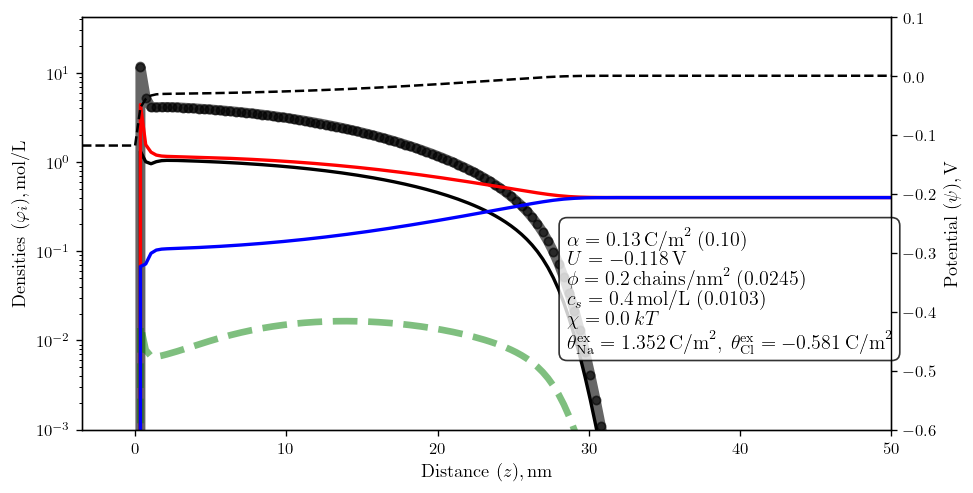

In [8]:
params = {
    "alpha": 0.1,
    'phi': 0.2,
    'chi': 0.0,
    'cna': 0.4,
}
paramsHP.update(params)

ax = None


Brush = Cap(**paramsHP)
Brush.loadData()
Brush.getProfiles()
str(Brush)
ax, output_pdf_path = Brush.plotSelectedProfiles(
    selected_lines=['Brush', 'charged', 'Ae', 'Na', 'Cl', 'potential'], 
    x_max = 50, y_min=1e-3)
fig = ax.get_figure()




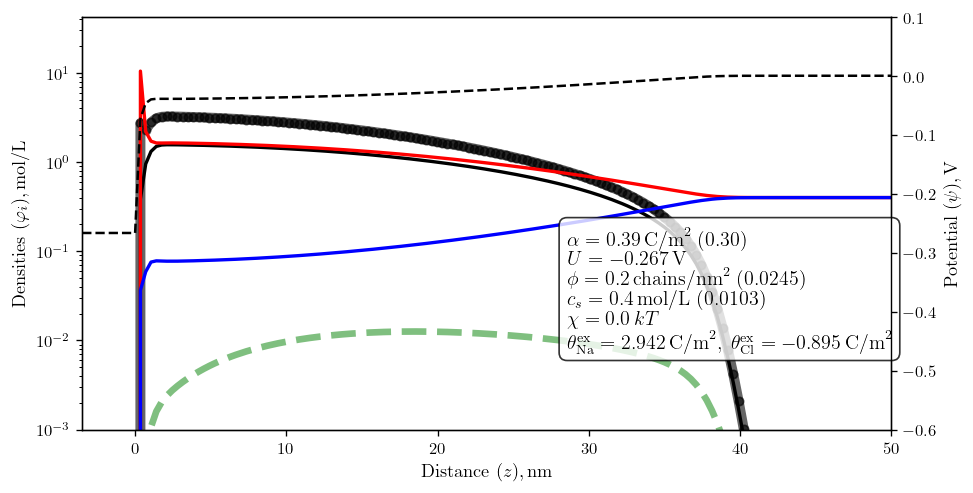

In [9]:
ax = None
alpha = 0.3
paramsHP.update({'alpha': alpha})

Brush = Cap(**paramsHP)
Brush.loadData()
# Cell.getTheta()
Brush.getProfiles()    # Cell.
str(Brush)
ax, output_pdf_path = Brush.plotSelectedProfiles(
    selected_lines=['Brush', 'charged', 'Ae', 'Na', 'Cl', 'potential'], 
    x_max = 50, y_min=1e-3)
fig = ax.get_figure()


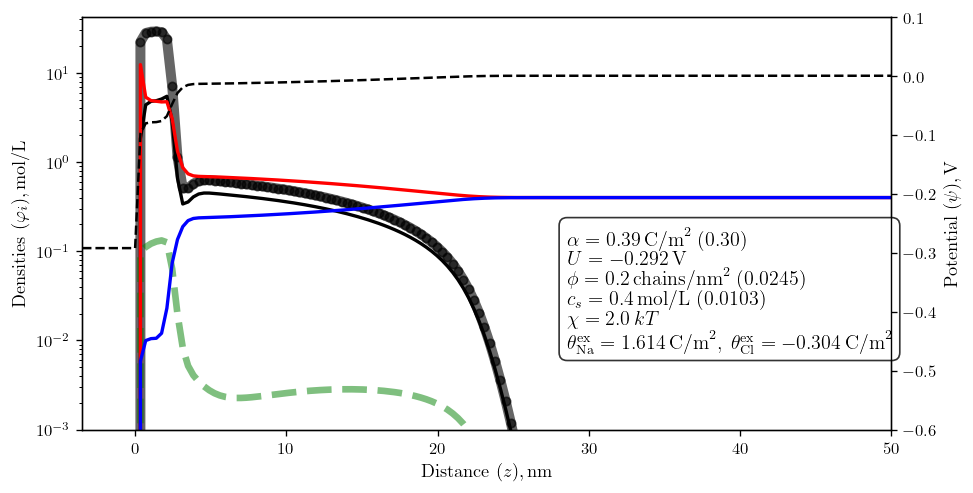

In [10]:
ax = None

chi = 2.0
paramsHP.update({'alpha': alpha})
paramsHP.update({'chi': chi})

Brush = Cap(**paramsHP)
Brush.loadData()
# Cell.getTheta()
Brush.getProfiles()    # Cell.
str(Brush)
# Cell.plotSelectedProfiles(selected_lines=['Na', 'Cl', 'H3O', 'OH', 'potential', 'subano'], y_min = 1e-8)
# ax = Cell.plotSelectedProfiles(selected_lines=['Na', 'Cl', 'potential', 'subano'], x_max = 20, ax = ax)
ax, output_pdf_path = Brush.plotSelectedProfiles(
    selected_lines=['Brush', 'charged', 'Ae', 'Na', 'Cl', 'potential'], 
    x_max = 50, y_min=1e-3)
fig = ax.get_figure()


## Figure 4. Excess ionic charge Q as a function of \psi
Total excess ionic charge $Q$ within the brush layer as a function of surface potential $\psi$ for different solvent qualities ($\chi = 0.0$ and 2.0) and two bulk salinities ($c_\mathrm{s}=0.40$ and 1.6 mol/L)

In [11]:
from cap import Cap
import os
from run_all import plotTV

palette = [
    'blue', 'red', 'green', 'orange', 'purple', 'brown',
    'cyan', 'magenta', 'olive', 'teal', 'navy', 'maroon'
]


phis = [0.0, 0.2]       # grafting densities (chains/nm²)
# pKs = [1.0, 2.0, 3.0]
pKs  = [1.0]            # pK values
# cnas = [0.1, 0.4, 1.6]
cnas = [0.4, 1.6]       # salinities (mol/L)
# chis = [4.0, 2.0, 0.0]
chis = [0.0, 2.0]            # Flory–Huggins parameter χ (in kT units)









ax = None
zero_phi_plotted = set()  # remembers which cna already plotted when phi==0

for pK in pKs:
    for phi in phis:
        for cna in cnas:
            for i, chi in enumerate(chis):

                # if phi=0: only plot once per cna (skip all further chi/pK)
                if phi == 0:
                    if cna in zero_phi_plotted:
                        continue
                                        
                key = f'pK{pK}cna{cna}chi{chi}phi{phi}'
                # this block checks if the data present in the loaded from pkl file dictionary. if not it runs calculation updates the dictionary and dumps into pkl file
                
                if not key in CAPSHL:
                     CAPS = getCAPS(pKs, cnas, chis, phis, Alphas, mp= True)
                    

                color = palette[i % len(palette)]
                fig, ax = plotTV(
                    CAPSHL[key], 
                    label = f'{key}', 
                    color = color, 
                    ylim=[-0.1, 8], 
                    xlim=[-0.1,0.7],
                    ax = ax
                )  
                # after first successful plot at phi=0 for this cna, skip the rest
                if phi == 0:
                    zero_phi_plotted.add(cna)
# key = graph.Add('key')


ModuleNotFoundError: No module named 'run_all'

In [ ]:
Brush.name